In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

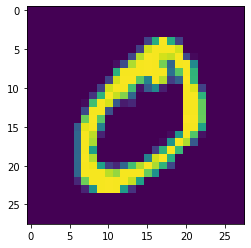

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))


Epoch 1/5
1875/1875 [==============================] - 211s 112ms/step - loss: 0.2785 - accuracy: 0.9459 - val_loss: 0.0924 - val_accuracy: 0.9706
Epoch 2/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0773 - accuracy: 0.9760 - val_loss: 0.0860 - val_accuracy: 0.9730
Epoch 3/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.1038 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0983 - val_accuracy: 0.9752
Epoch 5/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0978 - val_accuracy: 0.9749


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09782152622938156, 0.9749000072479248]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 102ms/step
[[3.68161057e-11 6.67821359e-20 5.88081619e-08 1.87149681e-07
  1.38719985e-19 5.77721532e-14 8.71757828e-20 9.99999762e-01
  6.56042365e-12 1.03814891e-11]
 [8.29208369e-11 4.34741854e-10 1.00000000e+00 2.88933021e-13
  5.90017144e-17 4.36518590e-20 1.38848657e-08 3.52764506e-17
  1.06316496e-12 8.98348387e-17]
 [3.25123210e-07 9.99987125e-01 6.34894604e-06 1.32739975e-09
  4.25947945e-07 3.79615557e-07 3.31401502e-08 2.79504295e-08
  5.41059262e-06 5.64168223e-09]
 [1.00000000e+00 1.07222096e-16 8.11713807e-10 4.51816607e-15
  3.67602243e-13 3.14972180e-11 1.39423211e-08 1.88798651e-12
  2.64326018e-12 2.13523366e-10]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("model.h5")

In [17]:
model=load_model("model.h5")
